<h1>Sobre o Conjunto de Dados</h1>

<p>De acordo com a Organização Mundial da Saúde (OMS), o AVC é a segunda principal causa de morte globalmente, responsável por aproximadamente 11% do total de mortes. Este conjunto de dados é utilizado para prever se um paciente tem probabilidade de ter um AVC com base em parâmetros como gênero, idade, diversas doenças e status de fumante. Cada linha nos dados fornece informações relevantes sobre o paciente.</p>

<h2>Informações dos Atributos</h2>
<p>1) id: identificador único<br>
2) gênero: "Masculino", "Feminino" ou "Outro"<br>
3) idade: idade do paciente<br>
4) hipertensão: 0 se o paciente não tem hipertensão, 1 se o paciente tem hipertensão<br>
5) doença_cardíaca: 0 se o paciente não tem nenhuma doença cardíaca, 1 se o paciente tem uma doença cardíaca<br>
6) já_casado: "Não" ou "Sim"<br>
7) tipo_de_trabalho: "Crianças", "Emprego Público", "Nunca Trabalhou", "Privado" ou "Autônomo"<br>
8) tipo_de_residência: "Rural" ou "Urbana"<br>
9) nível_médio_de_glicose: nível médio de glicose no sangue<br>
10) imc: índice de massa corporal<br>
11) status_de_fumante: "Fumante Anteriormente", "Nunca Fumou", "Fuma" ou "Desconhecido"*<br>
12) AVC: 1 se o paciente teve um AVC ou 0 se não teve<br>
*Nota: "Desconhecido" em status_de_fumante significa que as informações não estão disponíveis para este paciente</p>

In [1]:
import pandas as pd
import numpy  as np

dados = '/content/drive/MyDrive/Colab Notebooks/Dados/AVC_Prediction.csv'

df_original = pd.read_csv(dados)

In [2]:
df_original

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
renomear = {
    'gender': 'genero',
    'age': 'idade',
    'hypertension': 'hipertensao',
    'heart_disease': 'doenca_cardiaca',
    'ever_married': 'casado',
    'work_type': 'tipo_de_trabalho',
    'Residence_type': 'tipo_de_residência',
    'avg_glucose_level': 'nivel_medio_glicose',
    'bmi': 'imc',
    'smoking_status': 'status_de_fumante',
    'stroke': 'avc'
}

In [4]:
df_renomeado = df_original.rename(columns=renomear)
df_renomeado

,id,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_de_trabalho,tipo_de_residência,nivel_medio_glicose,imc,status_de_fumante,avc
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df_renomeado.describe()

,id,idade,hipertensao,doenca_cardiaca,nivel_medio_glicose,imc,avc
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df_renomeado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5110 non-null   int64  
 1   genero               5110 non-null   object 
 2   idade                5110 non-null   float64
 3   hipertensao          5110 non-null   int64  
 4   doenca_cardiaca      5110 non-null   int64  
 5   casado               5110 non-null   object 
 6   tipo_de_trabalho     5110 non-null   object 
 7   tipo_de_residência   5110 non-null   object 
 8   nivel_medio_glicose  5110 non-null   float64
 9   imc                  4909 non-null   float64
 10  status_de_fumante    5110 non-null   object 
 11  avc                  5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df_renomeado['genero'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [8]:
def verificar_unicos(dados):
  for coluna in dados:
    print('=' * 50)
    print(f'Coluna {coluna}')
    print(dados[coluna].unique())

In [9]:
verificar_unicos(df_renomeado)

Coluna id
[ 9046 51676 31112 ... 19723 37544 44679]
Coluna genero
['Male' 'Female' 'Other']
Coluna idade
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 

In [10]:
df_renomeado.query('genero == "Other"')

,id,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_de_trabalho,tipo_de_residência,nivel_medio_glicose,imc,status_de_fumante,avc
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [11]:
df_tratado = df_renomeado.query('genero != "Other"')
df_tratado

,id,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_de_trabalho,tipo_de_residência,nivel_medio_glicose,imc,status_de_fumante,avc
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
df_tratado['idade'] = df_tratado['idade'].astype(int)
df_tratado

<ipython-input-12-ccce973e51a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado['idade'] = df_tratado['idade'].astype(int)


,id,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_de_trabalho,tipo_de_residência,nivel_medio_glicose,imc,status_de_fumante,avc
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
df_tratado.drop(columns='id', inplace=True)
df_tratado

<ipython-input-13-fdc5f9e6a6f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado.drop(columns='id', inplace=True)


,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_de_trabalho,tipo_de_residência,nivel_medio_glicose,imc,status_de_fumante,avc
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [14]:
swap = {
    'Male':1,
    'Female': 0,
    'Yes': 1,
    'No': 0
}

df_tratado['genero'] = df_tratado['genero'].map(swap)
df_tratado['casado'] = df_tratado['casado'].map(swap)
df_tratado

<ipython-input-14-26ef92a1d1b9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado['genero'] = df_tratado['genero'].map(swap)
<ipython-input-14-26ef92a1d1b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado['casado'] = df_tratado['casado'].map(swap)


,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_de_trabalho,tipo_de_residência,nivel_medio_glicose,imc,status_de_fumante,avc
0,1,67,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,Private,Urban,83.75,NaN,never smoked,0
5106,0,81,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,0,35,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,1,51,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [15]:
verificar_unicos(df_tratado)

Coluna genero
[1 0]
Coluna idade
[67 61 80 49 79 81 74 69 59 78 54 50 64 75 60 57 71 52 82 65 58 42 48 72
 63 76 39 77 73 56 45 70 66 51 43 68 47 53 38 55  1 46 32 14  3  8 37 40
 35 20 44 25 27 23 17 13  4 16 22 30 29 11 21 18 33 24 34 36  0 41  5 26
 31  7 12 62  2  9 15 28 10 19  6]
Coluna hipertensao
[0 1]
Coluna doenca_cardiaca
[1 0]
Coluna casado
[1 0]
Coluna tipo_de_trabalho
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Coluna tipo_de_residência
['Urban' 'Rural']
Coluna nivel_medio_glicose
[228.69 202.21 105.92 ...  82.99 166.29  85.28]
Coluna imc
[36.6  nan 32.5 34.4 24.  29.  27.4 22.8 24.2 29.7 36.8 27.3 28.2 30.9
 37.5 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 25.4 22.2 30.5 26.5
 33.7 23.1 32.  29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5
 33.2 32.8 40.4 25.3 30.2 47.5 20.3 30.  28.9 28.1 31.1 21.7 27.  24.1
 45.9 44.1 22.9 29.1 32.3 41.1 25.6 29.8 26.3 26.2 29.4 24.4 28.  28.8
 34.6 19.4 30.3 41.5 22.6 56.6 27.1 31.3 31.  31.7 35.8 28.4 20.1

In [16]:
swap = {
    'Urban': 1,
    'Rural': 0
}

df_tratado['tipo_de_residência'] = df_tratado['tipo_de_residência'].map(swap)
df_tratado

<ipython-input-16-7e3d3d39985b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado['tipo_de_residência'] = df_tratado['tipo_de_residência'].map(swap)


,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_de_trabalho,tipo_de_residência,nivel_medio_glicose,imc,status_de_fumante,avc
0,1,67,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,1,80,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,Private,1,83.75,NaN,never smoked,0
5106,0,81,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,0,35,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,1,51,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [35]:

df_tratado['imc'].isnull().sum()

201

In [36]:
df_tratado = df_tratado.dropna(subset=['imc'])
df_tratado['imc'].isnull().sum()

0

In [37]:

df_tratado

,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_de_trabalho,tipo_de_residência,nivel_medio_glicose,imc,status_de_fumante,avc
0,1,67,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,1,80,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,1,81,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13,0,0,0,children,0,103.08,18.6,Unknown,0
5106,0,81,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,0,35,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,1,51,0,0,1,Private,0,166.29,25.6,formerly smoked,0


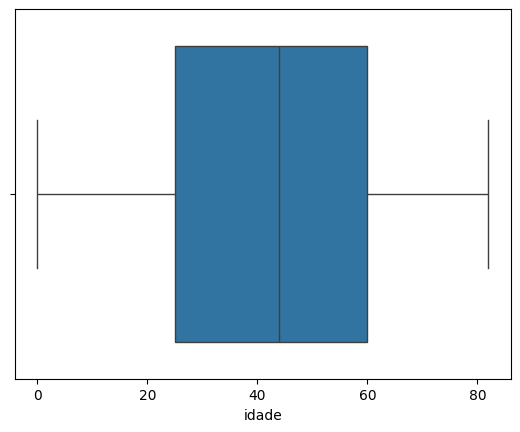

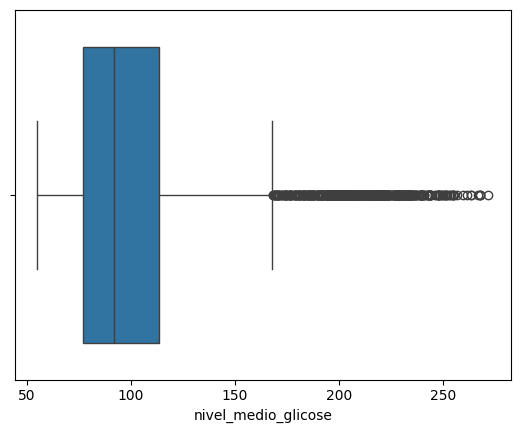

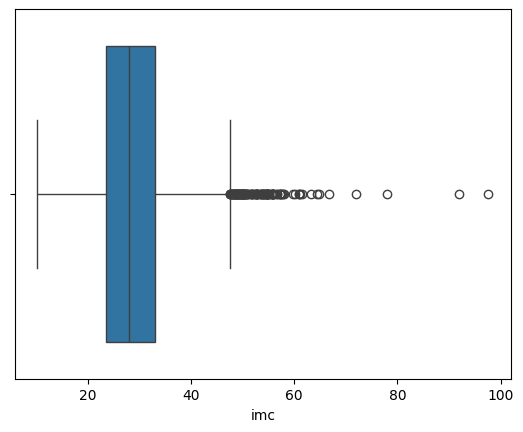

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

colunas_numericas = ['idade', 'nivel_medio_glicose', 'imc']

for coluna in colunas_numericas:
  plt.figure()
  sns.boxplot(x=df_tratado[coluna], showfliers=True)

plt.show()

<p>Apesar dos outliers é possível alguem chegar nesses números</p>

In [49]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

colunas = df_tratado.columns

one_hot = make_column_transformer(
    (OneHotEncoder(), ['tipo_de_trabalho', 'status_de_fumante']),
    remainder='passthrough',
    sparse_threshold=0
)

df_tratado = one_hot.fit_transform(df_tratado)

one_hot.get_feature_names_out(colunas)

array(['onehotencoder__tipo_de_trabalho_Govt_job',
       'onehotencoder__tipo_de_trabalho_Never_worked',
       'onehotencoder__tipo_de_trabalho_Private',
       'onehotencoder__tipo_de_trabalho_Self-employed',
       'onehotencoder__tipo_de_trabalho_children',
       'onehotencoder__status_de_fumante_Unknown',
       'onehotencoder__status_de_fumante_formerly smoked',
       'onehotencoder__status_de_fumante_never smoked',
       'onehotencoder__status_de_fumante_smokes', 'remainder__genero',
       'remainder__idade', 'remainder__hipertensao',
       'remainder__doenca_cardiaca', 'remainder__casado',
       'remainder__tipo_de_residência', 'remainder__nivel_medio_glicose',
       'remainder__imc', 'remainder__avc'], dtype=object)

In [50]:
df_tratado

array([[  0.  ,   0.  ,   1.  , ..., 228.69,  36.6 ,   1.  ],
       [  0.  ,   0.  ,   1.  , ..., 105.92,  32.5 ,   1.  ],
       [  0.  ,   0.  ,   1.  , ..., 171.23,  34.4 ,   1.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  82.99,  30.6 ,   0.  ],
       [  0.  ,   0.  ,   1.  , ..., 166.29,  25.6 ,   0.  ],
       [  1.  ,   0.  ,   0.  , ...,  85.28,  26.2 ,   0.  ]])

In [56]:
df_pronto = pd.DataFrame(df_tratado, columns=one_hot.get_feature_names_out(colunas))

In [57]:
x = df_pronto.drop(columns='remainder__avc')
y = df_pronto['remainder__avc']

In [60]:
from sklearn.model_selection import train_test_split

x, x_teste, y, y_teste = train_test_split(x,y,test_size=0.15, stratify=y, random_state=42)
x_treino, x_val, y_treino, y_val = train_test_split(x,y,stratify=y, random_state=42)

In [61]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_treino,y_treino)
print(f'Acurácia de validação: {modelo.score(x_val,y_val)}')

Acurácia de validação: 0.9482262703739214


In [63]:
from sklearn.metrics import confusion_matrix

y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[981  17]
 [ 37   8]]


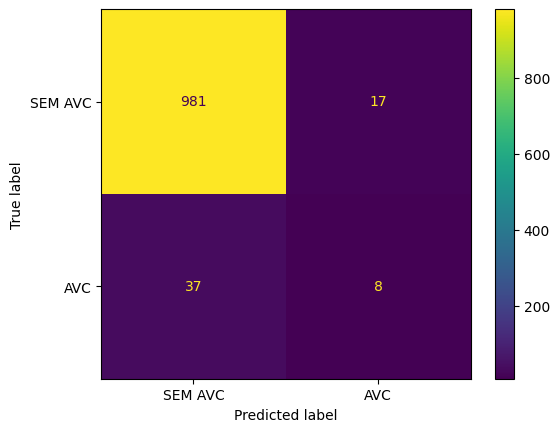

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['SEM AVC', 'AVC'])
visualizacao.plot();

In [67]:
from sklearn.metrics import precision_score, recall_score

print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall:   {recall_score(y_val, y_previsto)}')

Precisão: 0.32
Recall:   0.17777777777777778


In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       998
         1.0       0.32      0.18      0.23        45

    accuracy                           0.95      1043
   macro avg       0.64      0.58      0.60      1043
weighted avg       0.94      0.95      0.94      1043



In [70]:
from sklearn.model_selection import cross_validate, KFold

modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(modelo,x,y,cv=kf)
cv_resultados

{'fit_time': array([0.02240896, 0.0162704 , 0.01780152, 0.01632118, 0.0162878 ]),
 'score_time': array([0.0045929 , 0.00462961, 0.00423121, 0.00416899, 0.00871325]),
 'test_score': array([0.9245509 , 0.94364508, 0.94364508, 0.93165468, 0.92565947])}

In [71]:
cv_resultados['test_score']

array([0.9245509 , 0.94364508, 0.94364508, 0.93165468, 0.92565947])

In [72]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()

print(f'Intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1)}]')

Intervalo de confiança: [0.9170915561190521, 0.9505705297810899]


In [73]:
def intervalo_conf(resultados):
  media = resultados['test_score'].mean()
  desvio_padrao = resultados['test_score'].std()
  print(f'Intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1)}]')

In [74]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring='recall')
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.061800026969645476, 0.11562030096301643]


In [75]:
df_pronto['remainder__avc'].value_counts(normalize=True)

0.0    0.957416
1.0    0.042584
Name: remainder__avc, dtype: float64

<p>Não contem exemplos suficientes de casos com AVC positivo.</p>

In [77]:
from sklearn.model_selection import StratifiedKFold

modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=skf, scoring='recall')
intervalo_conf(cv_resultados)

Intervalo de confiança: [-0.014712384865945019, 0.18264889280245294]


In [78]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x,y)

In [79]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring='recall')
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.9195358251998059, 0.9712637645128989]


In [80]:
from imblearn.pipeline import Pipeline as imbpipeline

modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring='recall')
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.06538726985125588, 0.12604130157731552]


In [81]:
from imblearn.under_sampling import NearMiss

modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('udnersample', NearMiss(version=3)), ('arvore', modelo)])
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring='recall')
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.554014431323143, 0.7831284258197142]


              precision    recall  f1-score   support

         0.0       0.97      0.59      0.74       706
         1.0       0.06      0.58      0.11        31

    accuracy                           0.59       737
   macro avg       0.51      0.59      0.42       737
weighted avg       0.93      0.59      0.71       737



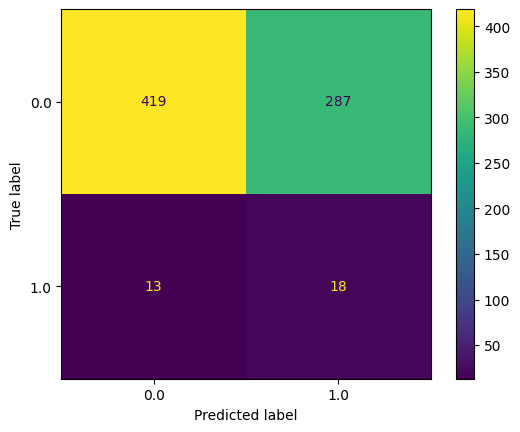

In [82]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x,y)

modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);